Importing Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Loading the Data

In [2]:

data = pd.read_csv("m1.csv", header=0)
df = data.T.reset_index()
df.columns = df.iloc[0]
df = df[1:]
df.head()



,District,Total number of holdings,Total area (ha) of holdings,Total number of holdings of vegetable,Total number of holdings cultivating vegetable using local seeds,Total number of holdings cultivating vegetable using improved seeds,Total number of holdings cultivating vegetable using hybrid seeds,Total number of holdings cultivating vegetable using pesticides,Total number of holdings cultivating vegetable using green_slightly toxic pesticides,Total number of holdings cultivating vegetable using blue_moderately toxic pesticides,Total number of holdings cultivating vegetable using yellow_highly toxic pesticides,Total number of holdings cultivating vegetable using red_extremely toxic pesticides,Total number of holdings cultivating vegetable using local fertilizer,Total number of holdings cultivating vegetable using mineral_chemical fertilizer,Total number of holdings cultivating vegetable using both local and mineral_chemical fertilizer,Total area (ha) of holdings cultivating vegetable using mineral_chemical fertilizer,Total quantity (quintal) of mineral_chemical fertilizer used for vegetable
1,Taplejung,24032.0,20284.8,19423.0,18806.0,522.0,95.0,1195.0,787.0,408.0,0.0,0.0,18817.0,53.0,553.0,29.6,389.26
2,Sankhuwasabha,32372.0,25277.9,20883.0,19566.0,1217.0,101.0,881.0,327.0,494.0,60.0,0.0,20033.0,60.0,791.0,84.2,562.94
3,Solukhumbu,22797.0,15789.3,9287.0,8581.0,600.0,107.0,151.0,65.0,86.0,0.0,0.0,9258.0,0.0,29.0,1.3,17.66
4,Okhaldhunga,32408.0,22284.5,11324.0,10395.0,613.0,316.0,545.0,444.0,101.0,0.0,0.0,11177.0,48.0,99.0,11.1,45.11
5,Khotang,38131.0,25616.8,33617.0,30397.0,2775.0,445.0,1819.0,988.0,631.0,193.0,8.0,33086.0,14.0,516.0,24.5,183.83


Renaiming the Columns

In [3]:
new_column_names = {
    "Total number of holdings": "Total_Holdings",
    "Total area (ha) of holdings": "Total_Area",
    "Total number of holdings of vegetable": "VegHoldings",
    "Total number of holdings cultivating vegetable using local seeds": "Local_Seed",
    "Total number of holdings cultivating vegetable using improved seeds": "Improved_Seed",
    "Total number of holdings cultivating vegetable using hybrid seeds": "Hybrid_Seed",
    "Total number of holdings cultivating vegetable using pesticides": "Pesticide",
    "Total number of holdings cultivating vegetable using green_slightly toxic pesticides": "Green_Pesticide",
    "Total number of holdings cultivating vegetable using blue_moderately toxic pesticides": "Blue_Pesticide",
    "Total number of holdings cultivating vegetable using yellow_highly toxic pesticides": "Yellow_Pesticide",
    "Total number of holdings cultivating vegetable using red_extremely toxic pesticides": "Red_Pesticide",
    "Total number of holdings cultivating vegetable using local fertilizer": "Local_Fertilizer",
    "Total number of holdings cultivating vegetable using mineral_chemical fertilizer": "Chemical_Fertilizer",
    "Total number of holdings cultivating vegetable using both local and mineral_chemical fertilizer": "Both_Fertilizer",
    "Total area (ha) of holdings cultivating vegetable using mineral_chemical fertilizer": "Chemical_Fertilizer_ha",
    "Total quantity (quintal) of mineral_chemical fertilizer used for vegetable": "Chemical_Fertilizer_Quantity"
}
df.rename(columns=new_column_names, inplace=True)
numeric_columns = list(new_column_names.values())
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

                     Understanding the Data

In [185]:
df.head(4)

,District,Total_Holdings,Total_Area,VegHoldings,Local_Seed,Improved_Seed,Hybrid_Seed,Pesticide,Green_Pesticide,Blue_Pesticide,...,Both_Fertilizer,Chemical_Fertilizer_ha,Chemical_Fertilizer_Quantity,Non_Hazardous,Hazardous,Soil_Degradation_Risk,Pesticide_Toxicity_Index,Chemical_Fertilizer_Per_Hectare,Seed_Diversity_Score,Health_Hazard_Risk
1,Taplejung,24032.0,20284.8,19423.0,18806.0,522.0,95.0,1195.0,787.0,408.0,...,553.0,29.6,389.26,787.0,408.0,0,816.0,0.002613,19095.5,1
2,Sankhuwasabha,32372.0,25277.9,20883.0,19566.0,1217.0,101.0,881.0,327.0,494.0,...,791.0,84.2,562.94,327.0,554.0,1,1168.0,0.002374,20204.8,1
3,Solukhumbu,22797.0,15789.3,9287.0,8581.0,600.0,107.0,151.0,65.0,86.0,...,29.0,1.3,17.66,65.0,86.0,1,172.0,0.000000,8913.1,1
4,Okhaldhunga,32408.0,22284.5,11324.0,10395.0,613.0,316.0,545.0,444.0,101.0,...,99.0,11.1,45.11,444.0,101.0,0,202.0,0.002154,10796.3,0


In [192]:
df.tail(4)

,District,Total_Holdings,Total_Area,VegHoldings,Local_Seed,Improved_Seed,Hybrid_Seed,Pesticide,Green_Pesticide,Blue_Pesticide,...,Both_Fertilizer,Chemical_Fertilizer_ha,Chemical_Fertilizer_Quantity,Non_Hazardous,Hazardous,Soil_Degradation_Risk,Pesticide_Toxicity_Index,Chemical_Fertilizer_Per_Hectare,Seed_Diversity_Score,Health_Hazard_Risk
74,Doti,39572.0,12790.8,11499.0,9709.0,979.0,810.0,1062.0,759.0,288.0,...,784.0,25.9,44.97,759.0,302.0,0,618.0,0.001095,10441.5,0
75,Achham,45214.0,16453.9,13953.0,10672.0,2364.0,918.0,840.0,692.0,148.0,...,292.0,8.2,150.42,692.0,148.0,0,296.0,0.002735,12129.4,0
76,Kailali,127016.0,62734.2,59441.0,29582.0,19073.0,10786.0,20717.0,11994.0,7274.0,...,22897.0,907.6,3555.96,11994.0,8723.0,0,18947.0,0.113574,42354.3,1
77,Kanchanpur,86170.0,42249.0,71787.0,30564.0,27402.0,13820.0,14631.0,9170.0,3193.0,...,17920.0,577.5,2478.68,9170.0,5461.0,0,13252.0,0.071931,48411.0,1


In [5]:
df.describe()

,Total_Holdings,Total_Area,VegHoldings,Local_Seed,Improved_Seed,Hybrid_Seed,Pesticide,Green_Pesticide,Blue_Pesticide,Yellow_Pesticide,Red_Pesticide,Local_Fertilizer,Chemical_Fertilizer,Both_Fertilizer,Chemical_Fertilizer_ha,Chemical_Fertilizer_Quantity
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,53646.597403,28810.515584,25682.727273,16592.493506,5691.844156,3398.467532,6857.584416,3645.883117,2279.051948,882.532468,50.103896,19701.051948,1179.610390,4802.077922,482.776623,1883.750909
std,32481.208115,21960.263548,20105.215822,12557.810182,7057.823921,3896.337418,8200.880125,4465.366434,2984.638654,1318.673941,108.346980,16295.282398,1801.393322,5669.632773,697.584853,3180.693435
min,951.000000,488.800000,384.000000,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,380.000000,0.000000,0.000000,0.000000,0.000000
25%,31526.000000,12239.800000,11254.000000,7219.000000,773.000000,366.000000,840.000000,470.000000,207.000000,28.000000,0.000000,6756.000000,53.000000,604.000000,24.500000,99.120000
50%,49742.000000,24772.100000,20883.000000,13270.000000,3231.000000,1994.000000,3507.000000,1908.000000,1162.000000,322.000000,10.000000,15474.000000,357.000000,2231.000000,219.800000,562.940000
75%,67885.000000,35647.300000,34362.000000,24774.000000,6899.000000,5002.000000,9543.000000,5218.000000,2866.000000,1242.000000,35.000000,27417.000000,1527.000000,7514.000000,581.700000,2107.330000
max,148133.000000,98232.600000,102264.000000,64624.000000,34948.000000,17202.000000,38690.000000,24634.000000,17628.000000,7052.000000,640.000000,92634.000000,7377.000000,22897.000000,2872.800000,20024.620000


In [186]:
df.shape

(72, 24)

Null Values

In [ ]:
df.isnull().sum()
# no null values

Duplicate Values

In [ ]:
df.duplicated().sum()

In [ ]:
df.duplicated(["District"]).sum()
# no duplicate values

EDA

  
  

  
      Scatter Plot and Handling Outliers

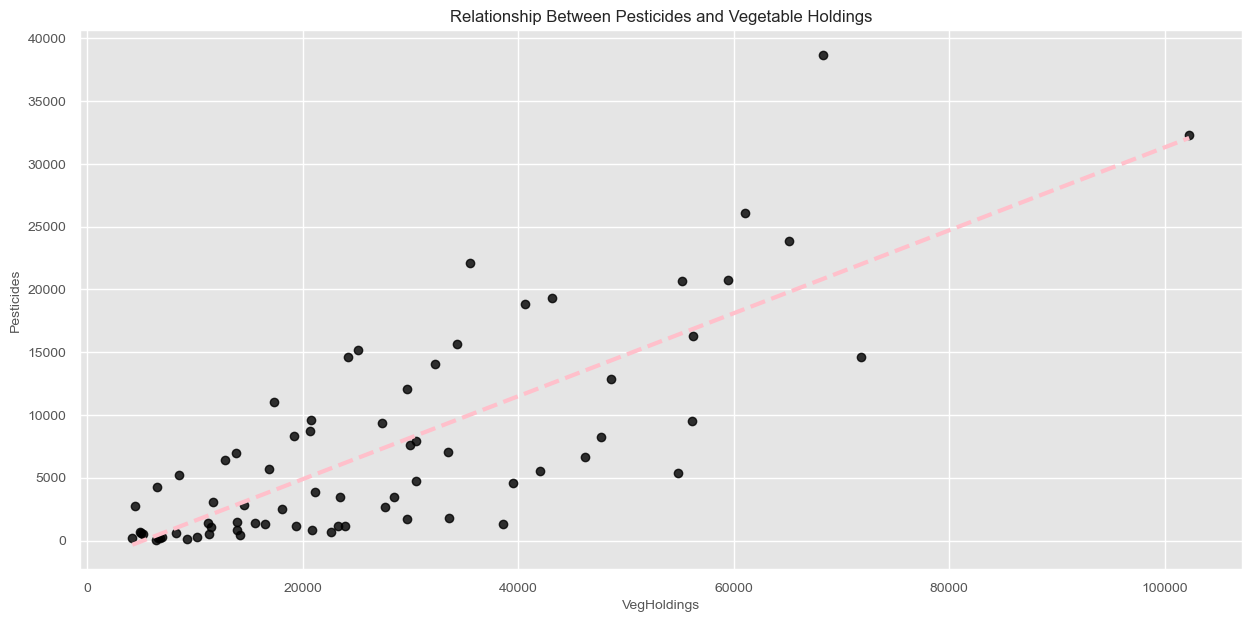

In [13]:
# Scatter Plot
plt.figure(figsize=(15,7))
sns.set_theme(style='darkgrid')
plt.style.use('ggplot')
sns.set_palette("coolwarm")
sns.regplot(x=df["VegHoldings"],y=df["Pesticide"],color="black",ci=None,
            line_kws={"color": "pink", "linewidth": 3, "linestyle": "--"})
plt.title("Relationship Between Pesticides and Vegetable Holdings",fontsize=12)
plt.xlabel("VegHoldings",fontsize=10)
plt.ylabel("Pesticides",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()






        Conclusion from the Diagram
        

 Outliers are crucial in this analysis as they may indicate districts with extremely high pesticide usage,  which is key for identifying areas requiring intervention. Therefore, including them is essential. 

Bar Chart

Total Number of Agricultural Holdings by District

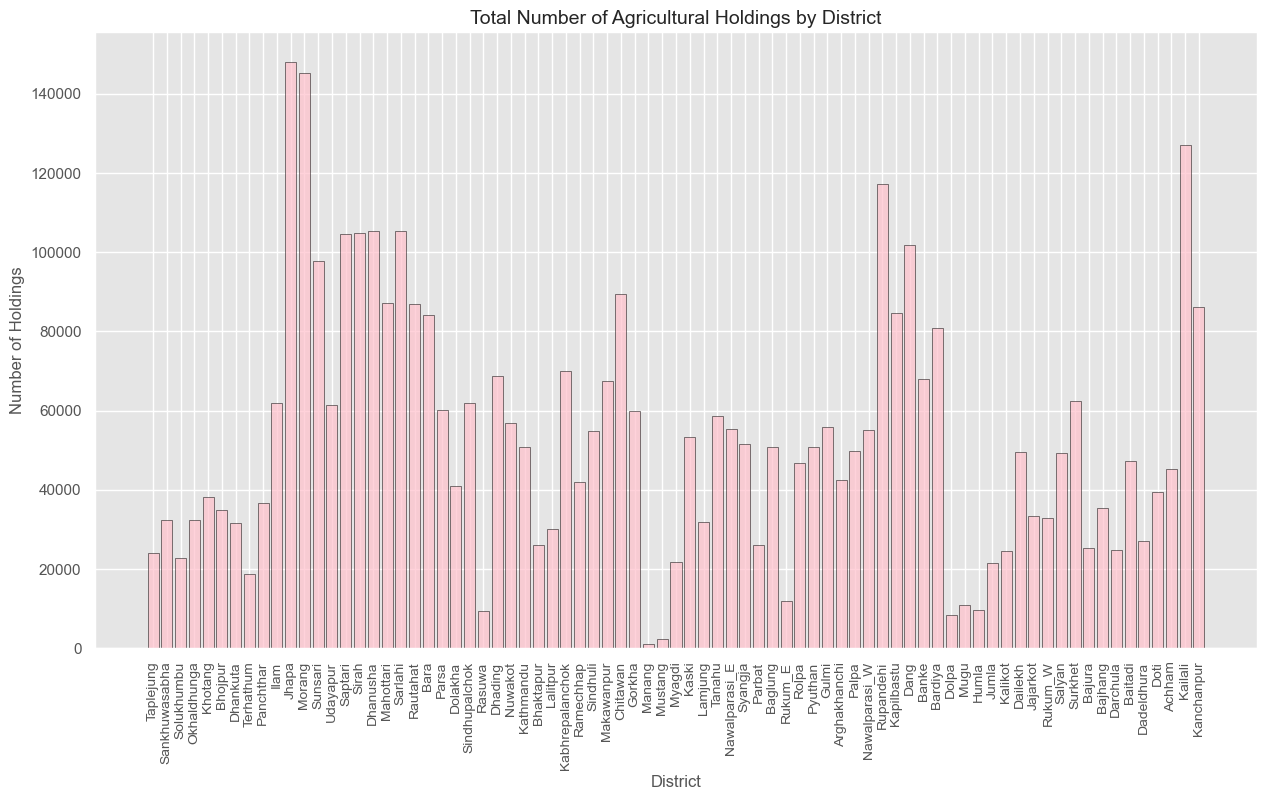

In [7]:
plt.figure(figsize=(15, 8))
plt.bar(df["District"], df['Total_Holdings'], color='pink', edgecolor='black',alpha=0.7)
plt.title('Total Number of Agricultural Holdings by District', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Holdings', fontsize=12)
plt.show()

Total Number of Vegetable Holdings by District

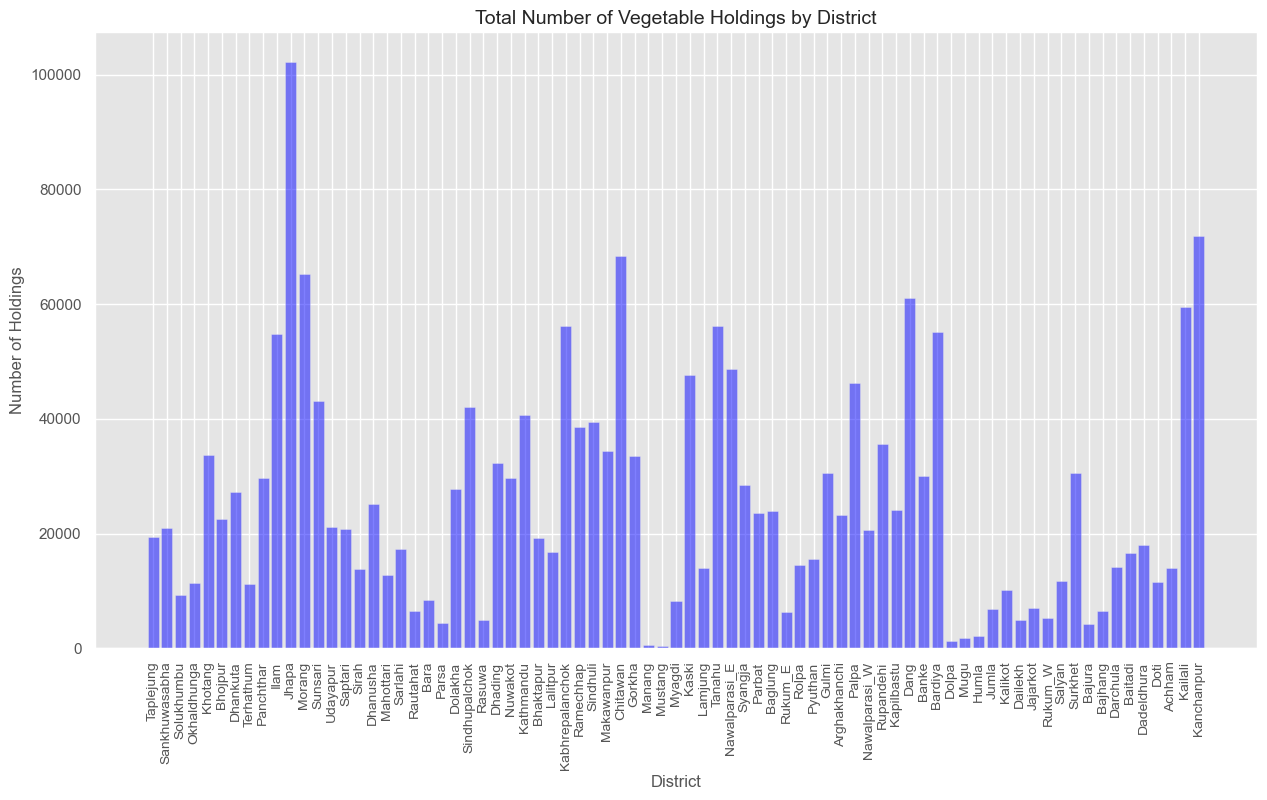

In [8]:

plt.figure(figsize=(15, 8))
plt.bar(df["District"], df['VegHoldings'], color='Blue',alpha=0.5)
plt.title('Total Number of Vegetable Holdings by District', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Holdings', fontsize=12)
plt.show()

Districts that do not contribute in  vegetables farming are removed

In [10]:

df = df.drop(df[df["District"].isin(
    ["Mustang", "Manang", "Dolpa", "Mugu", "Humla"])].index)

In [ ]:

plt.figure(figsize=(15, 8))
plt.bar(df["District"], df['VegHoldings'], color='Blue',alpha=0.5)
plt.title('Total Number of Vegetable Holdings by District', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Holdings', fontsize=12)
plt.show()

Total Number of Holdings Using Pesticides by District

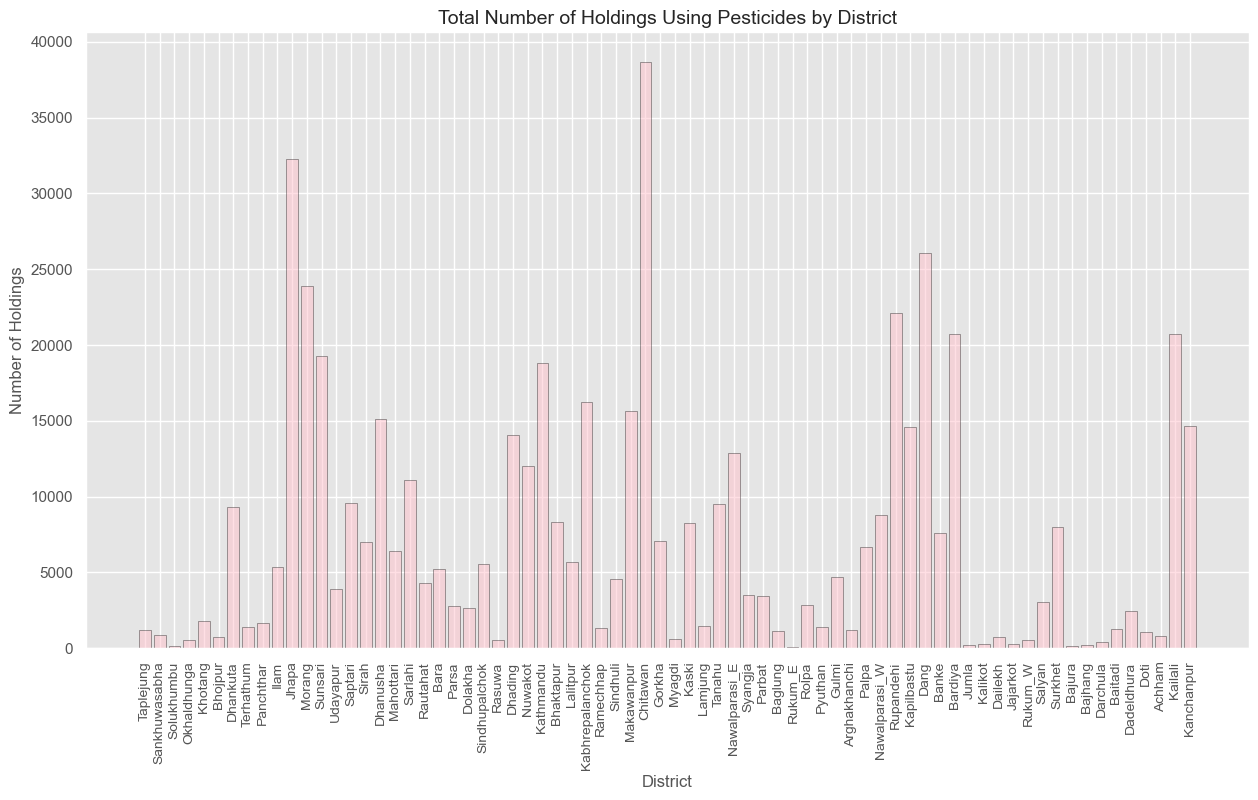

In [11]:
plt.figure(figsize=(15, 8))
plt.bar(df["District"], df['Pesticide'], color='Pink', edgecolor='black', alpha=0.5)
plt.title('Total Number of Holdings Using Pesticides by District', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Holdings', fontsize=12)
plt.show()

Pie Chart

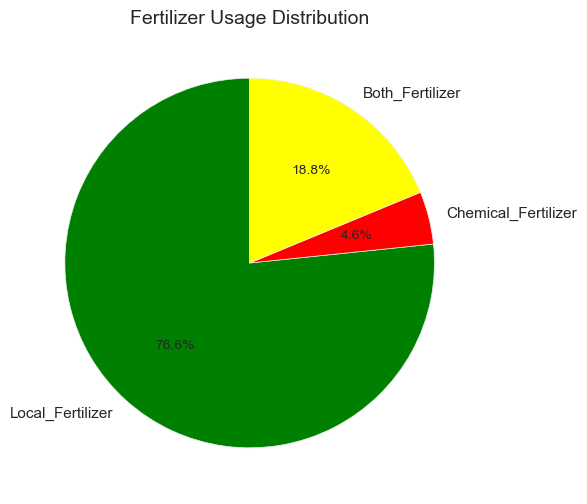

In [15]:
fertilizer_columns = ['Local_Fertilizer', 'Chemical_Fertilizer', 'Both_Fertilizer']
fertilizer_df = df[fertilizer_columns].sum()

plt.figure(figsize=(8, 6))
plt.pie(fertilizer_df, labels=fertilizer_df.index, autopct='%1.1f%%', startangle=90, colors=['Green', 'Red', 'Yellow'])
plt.title('Fertilizer Usage Distribution', fontsize=14)
plt.show()

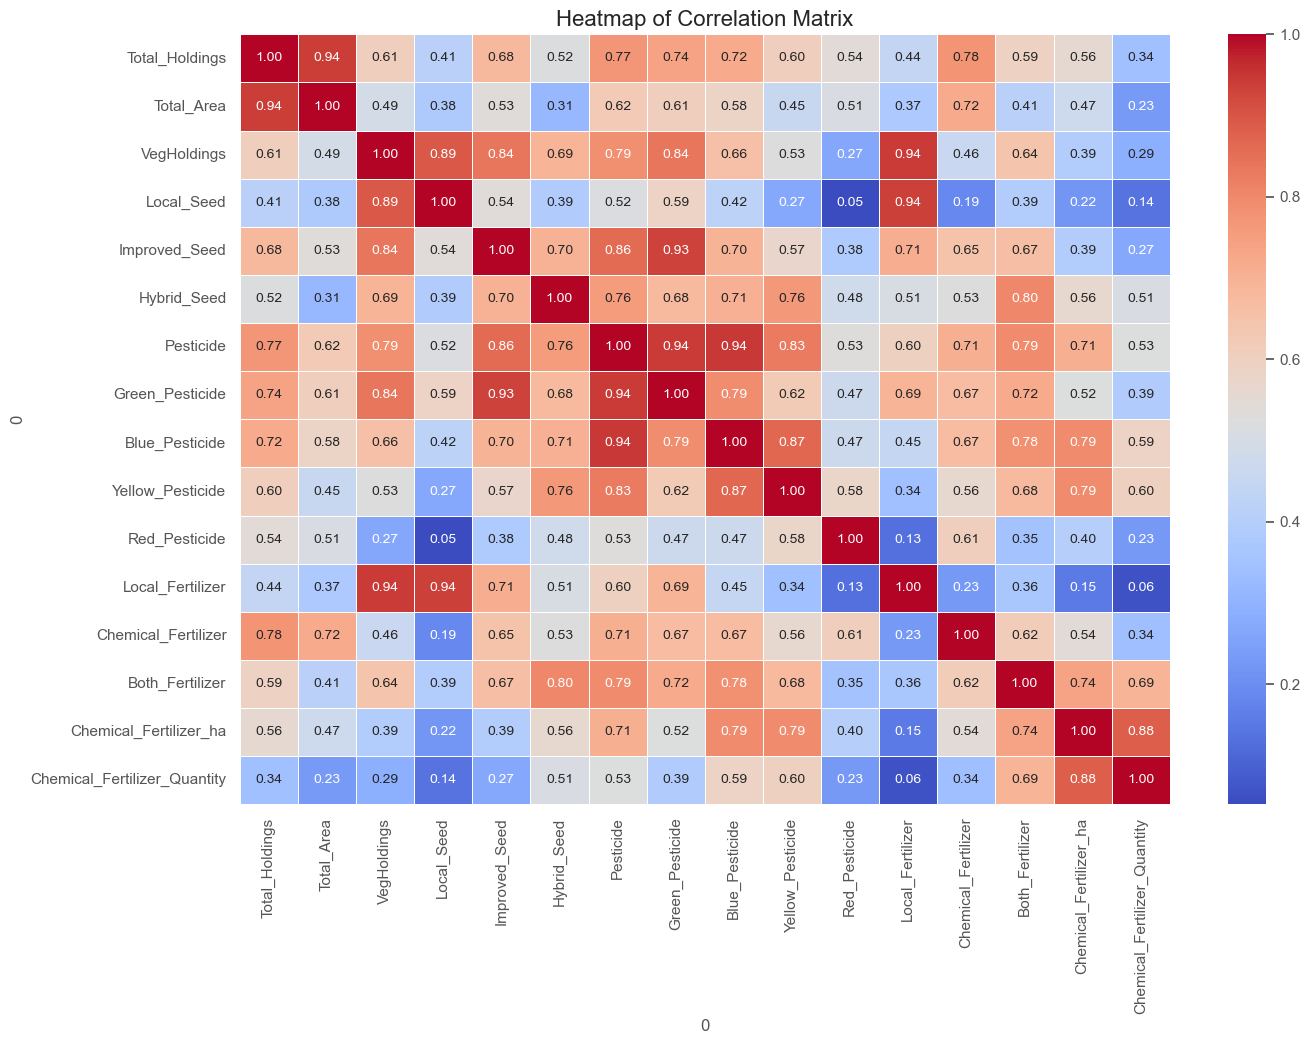

In [38]:

correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(15, 10)) 
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, cbar=True)
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.show()





Feature Engineering

In [39]:

df['Non_Hazardous'] = df['Green_Pesticide']
df['Hazardous'] = df['Blue_Pesticide'] + df['Yellow_Pesticide'] + df['Red_Pesticide']
df['Soil_Degradation_Risk'] = np.where(df['Hazardous'] > df['Non_Hazardous'], 1, 0)
df['Pesticide_Toxicity_Index'] = (
    df['Red_Pesticide'] * 4 +
    df['Yellow_Pesticide'] * 3 +
    df['Blue_Pesticide'] * 2
)
df['Chemical_Fertilizer_Per_Hectare'] = df['Chemical_Fertilizer'] / df['Total_Area']
df['Seed_Diversity_Score'] = df['Local_Seed'] + 0.5 * df['Improved_Seed'] + 0.3 * df['Hybrid_Seed']

In [40]:

df['Health_Hazard_Risk'] = np.where(df['Pesticide_Toxicity_Index'] > df['Green_Pesticide'], 1, 0)

Selecting Features and selecting training and testing data for soil degradation

In [41]:

soil_features = [
    'Total_Holdings', 'VegHoldings', 'Local_Seed', 'Improved_Seed', 'Hybrid_Seed',
    'Local_Fertilizer', 'Chemical_Fertilizer',
    'Pesticide_Toxicity_Index', 'Chemical_Fertilizer_Per_Hectare'
]
X_soil = df[soil_features]
y_soil = df['Soil_Degradation_Risk']
X_train_soil, X_test_soil, y_train_soil, y_test_soil = train_test_split(
    X_soil, y_soil, test_size=0.2, random_state=42)


Building predictive model(Random Forest Classifier)

In [73]:
model_soil_1 = RandomForestClassifier(random_state=42)
model_soil_1.fit(X_train_soil, y_train_soil)
y_pred_soil_rf = model_soil_1.predict(X_test_soil)


Xgb boost

In [74]:
model_soil_2=XGBClassifier(random_state=42)
model_soil_2.fit(X_train_soil,y_train_soil)
y_pred_soil_xgb=model_soil_2.predict(X_test_soil)


In [75]:
print("Soil Degradation Model Results Random Forest Classifier:")
print(confusion_matrix(y_test_soil, y_pred_soil_rf))
print(classification_report(y_test_soil, y_pred_soil_rf))

print("Soil Degradation Model Results XGB Boost :")
print(confusion_matrix(y_test_soil, y_pred_soil_xgb))
print(classification_report(y_test_soil, y_pred_soil_xgb))


Soil Degradation Model Results Random Forest Classifier:
[[12  0]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.67      0.80         3

    accuracy                           0.93        15
   macro avg       0.96      0.83      0.88        15
weighted avg       0.94      0.93      0.93        15

Soil Degradation Model Results XGB Boost :
[[11  1]
 [ 2  1]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.50      0.33      0.40         3

    accuracy                           0.80        15
   macro avg       0.67      0.62      0.64        15
weighted avg       0.78      0.80      0.78        15



Selecting features for training and testing data (health )



In [42]:

health_features = [
     'VegHoldings', 'Local_Seed', 'Improved_Seed', 'Hybrid_Seed',
    'Local_Fertilizer', 'Chemical_Fertilizer',
    'Pesticide_Toxicity_Index'
]
X_health = df[health_features]
y_health = df['Health_Hazard_Risk']
X_train_health, X_test_health, y_train_health, y_test_health = train_test_split(
    X_health, y_health, test_size=0.3, random_state=42)



Training random forest classifier 

In [65]:

model_health_1 = RandomForestClassifier(random_state=42)
model_health_1.fit(X_train_health, y_train_health)
y_pred_health_rf = model_health_1.predict(X_test_health)

Training Xgboost

In [66]:

model_health_2 = XGBClassifier(random_state=42)
model_health_2.fit(X_train_health, y_train_health)
y_pred_health_xgb = model_soil_2.predict(X_test_health)

In [76]:
print("Health Hazard Model Results:")
print(confusion_matrix(y_test_health, y_pred_health_rf))
print(classification_report(y_test_health, y_pred_health_rf))
print("Health Hazard Model Results:")
print(confusion_matrix(y_test_health, y_pred_health_xgb))
print(classification_report(y_test_health, y_pred_health_xgb))



Health Hazard Model Results:
[[ 1  2]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.90      0.95      0.92        19

    accuracy                           0.86        22
   macro avg       0.70      0.64      0.66        22
weighted avg       0.85      0.86      0.85        22

Health Hazard Model Results:
[[ 1  2]
 [ 3 16]]
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.89      0.84      0.86        19

    accuracy                           0.77        22
   macro avg       0.57      0.59      0.58        22
weighted avg       0.80      0.77      0.79        22



In [ ]:

soil_importances = model_soil.feature_importances_
soil_importance_df = pd.DataFrame({'Feature': soil_features, 'Importance': soil_importances})
soil_importance_df = soil_importance_df.sort_values(by='Importance', ascending=False)
print("Soil Degradation Feature Importance:")
print(soil_importance_df)
health_importances = model_health.feature_importances_
health_importance_df = pd.DataFrame({'Feature': health_features, 'Importance': health_importances})
health_importance_df = health_importance_df.sort_values(by='Importance', ascending=False)
print("Health Hazard Feature Importance:")
print(health_importance_df)

In [ ]:

def apply_log_transformation(column):
    return np.log(column + 1) 

columns_to_transform = [
    "Total_Holdings", "Total_Area", "VegHoldings",
    "Chemical_Fertilizer", "Chemical_Fertilizer_Quantity"
]
for col in columns_to_transform:
    df[f"{col}_Log"] = apply_log_transformation(df[col])

soil_features = [
    'Total_Holdings_Log', 'VegHoldings_Log', 'Local_Seed', 'Improved_Seed', 'Hybrid_Seed',
    'Local_Fertilizer', 'Chemical_Fertilizer_Log',
    'Pesticide_Toxicity_Index', 'Chemical_Fertilizer_Per_Hectare'
]
X_soil = df[soil_features]
y_soil = df['Soil_Degradation_Risk']

health_features = [
    'VegHoldings_Log', 'Local_Seed', 'Improved_Seed', 'Hybrid_Seed',
    'Local_Fertilizer', 'Chemical_Fertilizer_Log',
    'Pesticide_Toxicity_Index'
]
X_health = df[health_features]
y_health = df['Health_Hazard_Risk']

X_train_soil, X_test_soil, y_train_soil, y_test_soil = train_test_split(X_soil, y_soil, test_size=0.2, random_state=42)
X_train_health, X_test_health, y_train_health, y_test_health = train_test_split(X_health, y_health, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_soil_scaled = scaler.fit_transform(X_train_soil)
X_test_soil_scaled = scaler.transform(X_test_soil)
X_train_health_scaled = scaler.fit_transform(X_train_health)
X_test_health_scaled = scaler.transform(X_test_health)

knn_soil = KNeighborsClassifier(n_neighbors=5)
knn_soil.fit(X_train_soil_scaled, y_train_soil)
y_pred_soil = knn_soil.predict(X_test_soil_scaled)

print("Soil Degradation Model Results (KNN):")
print(confusion_matrix(y_test_soil, y_pred_soil))
print(classification_report(y_test_soil, y_pred_soil))

knn_health = KNeighborsClassifier(n_neighbors=5)
knn_health.fit(X_train_health_scaled, y_train_health)
y_pred_health = knn_health.predict(X_test_health_scaled)

print("Health Hazard Model Results (KNN):")
print(confusion_matrix(y_test_health, y_pred_health))
print(classification_report(y_test_health, y_pred_health))